#IMPORTING LIBRARIES

In [ ]:
#Import Necessary Libraries
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense

#UNZIP THE DATASET

In [ ]:
!unzip '/content/drive/MyDrive/Flowers-Dataset.zip'

Archive:  /content/drive/MyDrive/Flowers-Dataset.zip
replace flowers/daisy/100080576_f52e8ee070_n.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

 #Image Augmentation

In [ ]:
#Training the Variable
train_data = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_data = ImageDataGenerator(rescale=1./255)

In [ ]:
#Testing the Variable(xtrain)
xtrain=train_data.flow_from_directory('/content/flowers',
                                         target_size=(76,76),
                                         class_mode='categorical',
                                         batch_size=100)

Found 4317 images belonging to 5 classes.


In [ ]:
#Testing the Variable(xtest)
xtest=test_data.flow_from_directory('/content/flowers',
                                         target_size=(76,76),
                                         class_mode='categorical',
                                         batch_size=100)

Found 4317 images belonging to 5 classes.



#CNN MODELING


In [ ]:
model = Sequential()

In [ ]:
# Add Layers (Convolution,MaxPooling,Flatten,Dense-(Hidden Layers),Output)
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(64,64,3))) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Flatten())
model.add(Dense(300,activation='relu')) 
model.add(Dense(150,activation='relu')) 
model.add(Dense(4,activation='softmax')) 

In [ ]:
#Compile The Model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
#Fit The Model
model.fit_generator(xtrain,steps_per_epoch= len(xtrain),epochs= 10,validation_data=xtest,validation_steps= len(xtest))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/10


InvalidArgumentError: ignored

# SAVE THE MODEL

In [ ]:
model.save('flower.h5')

# TEST THE MODEL

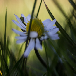

In [ ]:
img=image.load_img('/content/flowers/daisy/12891819633_e4c82b51e8.jpg',target_size=(76,76))
img

In [ ]:
x=image.img_to_array(img)
x


array([[[200., 168., 117.],
        [201., 170., 116.],
        [199., 169., 115.],
        ...,
        [157., 142.,  85.],
        [156., 144.,  86.],
        [131., 119.,  71.]],

       [[205., 174., 120.],
        [203., 172., 117.],
        [199., 169., 115.],
        ...,
        [108., 100.,  63.],
        [149., 138.,  84.],
        [116., 105.,  60.]],

       [[207., 176., 121.],
        [205., 174., 119.],
        [199., 173., 116.],
        ...,
        [ 31.,  39.,  18.],
        [125., 117.,  70.],
        [100.,  92.,  53.]],

       ...,

       [[ 68.,  57.,  11.],
        [208., 163.,  18.],
        [ 19.,  28.,  11.],
        ...,
        [ 16.,  24.,  11.],
        [ 15.,  20.,  14.],
        [  8.,  16.,   3.]],

       [[ 20.,  25.,   3.],
        [159., 123.,  26.],
        [ 22.,  29.,  13.],
        ...,
        [ 15.,  21.,   7.],
        [ 18.,  25.,  18.],
        [ 16.,  25.,  22.]],

       [[ 25.,  30.,   7.],
        [ 31.,  32.,   1.],
        [ 57.,  

In [ ]:
x= np.expand_dims(x,axis=0)
x

array([[[[200., 168., 117.],
         [201., 170., 116.],
         [199., 169., 115.],
         ...,
         [157., 142.,  85.],
         [156., 144.,  86.],
         [131., 119.,  71.]],

        [[205., 174., 120.],
         [203., 172., 117.],
         [199., 169., 115.],
         ...,
         [108., 100.,  63.],
         [149., 138.,  84.],
         [116., 105.,  60.]],

        [[207., 176., 121.],
         [205., 174., 119.],
         [199., 173., 116.],
         ...,
         [ 31.,  39.,  18.],
         [125., 117.,  70.],
         [100.,  92.,  53.]],

        ...,

        [[ 68.,  57.,  11.],
         [208., 163.,  18.],
         [ 19.,  28.,  11.],
         ...,
         [ 16.,  24.,  11.],
         [ 15.,  20.,  14.],
         [  8.,  16.,   3.]],

        [[ 20.,  25.,   3.],
         [159., 123.,  26.],
         [ 22.,  29.,  13.],
         ...,
         [ 15.,  21.,   7.],
         [ 18.,  25.,  18.],
         [ 16.,  25.,  22.]],

        [[ 25.,  30.,   7.],
       

In [ ]:
pred = np.argmax(model.predict(x))
pred
op=['sunflower','dandelion','rose','daisy','tulip']
op[pred] 

ValueError: ignored

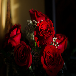

In [ ]:
img=image.load_img('/content/flowers/rose/14166797345_d2ab9da518.jpg',target_size=(76,76))
img

In [ ]:
x=image.img_to_array(img)
x
x=np.expand_dims(x,axis=0)
x

array([[[[210., 153.,  82.],
         [154., 114.,  45.],
         [146., 109.,  39.],
         ...,
         [  4.,   0.,   0.],
         [  2.,   1.,   0.],
         [  0.,   0.,   0.]],

        [[207., 151.,  77.],
         [146., 107.,  42.],
         [154., 118.,  44.],
         ...,
         [  5.,   1.,   0.],
         [  4.,   0.,   0.],
         [  0.,   0.,   0.]],

        [[203., 149.,  77.],
         [138., 100.,  38.],
         [157., 123.,  49.],
         ...,
         [  5.,   1.,   0.],
         [  4.,   0.,   0.],
         [  0.,   0.,   0.]],

        ...,

        [[  6.,   1.,   0.],
         [  8.,   3.,   0.],
         [  5.,   1.,   0.],
         ...,
         [  3.,   5.,   4.],
         [  3.,   5.,   4.],
         [  2.,   4.,   3.]],

        [[  8.,   3.,   0.],
         [  9.,   4.,   1.],
         [  7.,   3.,   0.],
         ...,
         [  7.,   8.,  10.],
         [  6.,   8.,   7.],
         [  5.,   7.,   6.]],

        [[  8.,   3.,   0.],
       

In [ ]:
pred=np.argmax(model.predict(x))
pred
op=['daisy','dandelion','sunflower','rose','tulip']
op[pred]

ValueError: ignored